In [82]:
# CS6350.001- Group Project
# Dr. Latifur Khan
# Name: Parth Bhardwaj
# Net Id: PXB180006

# Sub-Problem: Finding the correlation between the population of different age groups in a county vs number of pharmacies in that county

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [83]:
# reading the data files

df_demography = pd.read_excel(r'Demography_USA.xlsx', sheet_name=None)
df_pharmacy = pd.read_excel(r'Pharmacy-County.xlsx', sheet_name=None)

In [84]:
# All the states that we have data for

states_with_county_info = ['Alaska', 'Arkansas', 'California', 'Hawaii', 'Idaho', 'Maine', 'Missouri', 'Montana',
 'Nebraska', 'North Carolina', 'Oregon', 'Rhode island', 'Texas', 'Other State'] 

other_states = ['Arizona', 'Georgia', 'Iowa', 'Illinois', 
 'Indianapolis', 'Kentucky', 'Louisiana', 'Maine', 'Minnesota', 'Mississipi', 'New York', 'Ohio', 
 'Pennsylvania', 'South Carolina', 'Virginia', 'Washington']

In [85]:
# data frame to store rows with county information
df_states_county = pd.DataFrame()

for state in states_with_county_info:
    if state == 'Other State':
        df_temp_other_state = df_pharmacy[state]
        for ix in df_temp_other_state.index:
            state_name = df_temp_other_state.loc[ix]['State']
            if state_name in other_states:
                df_states_county = df_states_county.append(df_temp_other_state.loc[ix])
    
    else:
        df_temp_state = df_pharmacy[state]
        df_states_county = df_states_county.append(df_temp_state)


In [87]:
# saving to an excel file

df_states_county.to_excel(r'Pharmacy-County-States.xlsx', index = False)
#print(df_states_county)

In [88]:
# reading from the excel file
df_states_county_new = pd.read_excel(r'Pharmacy-County-States.xlsx')

# Converting the county names to lowercase strings for matching
df_states_county_new['county'] = df_states_county_new['county'].str.lower()
#print(df_states_county_new)

In [89]:
# Removing the string ' county' from the county names for efficient matching
for ix in df_states_county_new.index:
    county_name = df_states_county_new.loc[ix]['county']
    if not isinstance(county_name, float):
        if ' county' in county_name:
            county_name_new = county_name.replace(' county', '')
            df_states_county_new['county'] = df_states_county_new['county'].replace(county_name, county_name_new)

In [90]:
# saving to excel file
df_states_county_new.to_excel(r'Pharmacy-County-States.xlsx', index = False)

In [91]:
# dictionary to store pharmacy count for diff counties
pharmacy_count = {}

In [92]:
# Adding data to the dictionary with key - 'County name: State name'
for ix in df_states_county_new.index:
    county_name = df_states_county_new.loc[ix]['county']
    state_name = df_states_county_new.loc[ix]['State']
    if not isinstance(county_name, float):
        if not isinstance(state_name, float):
            state_name = state_name.lower()
            county_state_key = county_name + ":" + state_name
            pharmacy_count[county_state_key] = pharmacy_count.get(county_state_key, 0) + 1

In [93]:
# dataframe to store the Age sheet from excel
df_ages = df_demography['Ages']

# converting the county name to lowercase strings for efficient matching
df_ages['County Name'] = df_ages['County Name'].str.lower()
print(df_ages)


      OBJECTID        NAME County Name STATE_NAME State  AGE_UNDER5  AGE_5_9  \
0          651    Randolph    randolph    Alabama    AL        1385     1468   
1          791       Henry       henry    Alabama    AL         937     1076   
2          808       Lamar       lamar    Alabama    AL         861      892   
3          846        Dale        dale    Alabama    AL        3690     3459   
4          912      Coffee      coffee    Alabama    AL        3303     3187   
...        ...         ...         ...        ...   ...         ...      ...   
3214      3028    Sublette    sublette    Wyoming    WY         720      666   
3215      3083      Carbon      carbon    Wyoming    WY        1133     1053   
3216      3123  Sweetwater  sweetwater    Wyoming    WY        3666     3365   
3217      3136        Park        park    Wyoming    WY        1639     1571   
3218      3159     Fremont     fremont    Wyoming    WY        3145     2845   

      AGE_10_14  AGE_15_19  AGE_20_24  

In [94]:
# adding the 'Pharmacy Count' column in the ages dataframe
for ix in df_ages.index:
    county_name = df_ages.loc[ix]['County Name']
    state_name = df_ages.loc[ix]['STATE_NAME']
    if not isinstance(county_name, float):
        if not isinstance(state_name, float):
            state_name = state_name.lower()
            county_state_key = county_name + ":" + state_name
            #df_diseases = df_diseases.copy()
            if county_state_key in pharmacy_count:
                df_ages.loc[[ix],['Pharmacy Count']] = pharmacy_count[county_state_key]

In [95]:
# Saving to excel file
df_ages.to_excel(r'Pharmacy-Age.xlsx', index = False)
df_ages = pd.read_excel(r'Pharmacy-Age.xlsx')

In [96]:
print(df_ages.notnull().sum())

OBJECTID          3219
NAME              3219
County Name       3219
STATE_NAME        3219
State             3219
AGE_UNDER5        3219
AGE_5_9           3219
AGE_10_14         3219
AGE_15_19         3219
AGE_20_24         3219
AGE_25_34         3219
AGE_35_44         3219
AGE_45_54         3219
AGE_55_64         3219
AGE_65_74         3219
AGE_75_84         3219
AGE_85_UP         3219
MED_AGE           3219
MED_AGE_M         3219
MED_AGE_F         3219
Pharmacy Count     856
dtype: int64


In [ ]:
# dropping null columns from the ages dataframe
df_ages = df_ages.dropna(how='all', axis=1)

# dropping rows for which we do not have the pharmacy data
df_ages = df_ages[df_ages['Pharmacy Count'].notna()]

print(df_ages)

print(df_ages.notnull().sum())

In [139]:
# Calculating the correlation between the population of different age groups in a particular county vs the number of pharmacies in that county
age_below_five = df_ages['AGE_UNDER5'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_Under5 vs pharmacy count: ", age_below_five)

age_five_to_nine = df_ages['AGE_5_9'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_5_9 vs pharmacy count: ", age_five_to_nine)

age_ten_to_fourteen = df_ages['AGE_10_14'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_10_14 vs pharmacy count: ", age_ten_to_fourteen)

age_fifteen_to_nineteen = df_ages['AGE_15_19'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_15_19 vs pharmacy count: ", age_fifteen_to_nineteen)

age_twenty_to_twentyfour = df_ages['AGE_20_24'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_20_24 vs pharmacy count: ", age_twenty_to_twentyfour)

age_twentyfive_to_thirtyfour = df_ages['AGE_25_34'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_25_34 vs pharmacy count: ", age_twentyfive_to_thirtyfour)

age_thirtyfive_to_fortyfour = df_ages['AGE_35_44'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_35_44 vs pharmacy count: ", age_thirtyfive_to_fortyfour)

age_fortyfive_to_fiftyfour = df_ages['AGE_45_54'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_35_44 vs pharmacy count: ", age_fortyfive_to_fiftyfour)

age_fiftyfive_to_sixtyfour = df_ages['AGE_55_64'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_55_64 vs pharmacy count: ", age_fiftyfive_to_sixtyfour)

age_sixtyfive_to_seventyfour = df_ages['AGE_65_74'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_65_74 vs pharmacy count: ", age_sixtyfive_to_seventyfour)

age_seventyfive_to_eightyfour = df_ages['AGE_75_84'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_75_84 vs pharmacy count: ", age_seventyfive_to_eightyfour)

age_eightyfive_above = df_ages['AGE_85_UP'].corr(df_ages['Pharmacy Count']) 
print("Correlation for Age_85_UP vs pharmacy count: ", age_eightyfive_above)


Correlation for Age_Under5 vs pharmacy count:  0.8362298566479308
Correlation for Age_5_9 vs pharmacy count:  0.8374871885920583
Correlation for Age_10_14 vs pharmacy count:  0.8414673427223255
Correlation for Age_15_19 vs pharmacy count:  0.8405724038626902
Correlation for Age_20_24 vs pharmacy count:  0.8263750294107653
Correlation for Age_25_34 vs pharmacy count:  0.8172218138864701
Correlation for Age_35_44 vs pharmacy count:  0.83436384241027
Correlation for Age_35_44 vs pharmacy count:  0.8180768037734093
Correlation for Age_55_64 vs pharmacy count:  0.7974414172858073
Correlation for Age_65_74 vs pharmacy count:  0.7790769355630991
Correlation for Age_75_84 vs pharmacy count:  0.7574743036396672
Correlation for Age_85_UP vs pharmacy count:  0.7370379100278556


In [121]:
# correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_ages.corr()
corr.style.background_gradient(cmap='coolwarm')
#print(corr)

,OBJECTID,AGE_UNDER5,AGE_5_9,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_65_74,AGE_75_84,AGE_85_UP,MED_AGE,MED_AGE_M,MED_AGE_F,Pharmacy Count
OBJECTID,1.000000,0.116458,0.118302,0.119393,0.117359,0.107670,0.100693,0.105600,0.110876,0.116754,0.118023,0.114603,0.113324,0.000777,0.013003,-0.011517,0.112670
AGE_UNDER5,0.116458,1.000000,0.999220,0.997252,0.994087,0.988287,0.990387,0.992578,0.989803,0.984967,0.979104,0.965483,0.949649,-0.237863,-0.236553,-0.242510,0.836230
AGE_5_9,0.118302,0.999220,1.000000,0.998749,0.994709,0.985497,0.986870,0.991977,0.990300,0.985104,0.979745,0.966370,0.950352,-0.235761,-0.234785,-0.240351,0.837487
AGE_10_14,0.119393,0.997252,0.998749,1.000000,0.997741,0.986995,0.986057,0.992928,0.992250,0.987052,0.982649,0.970968,0.956096,-0.226499,-0.226048,-0.230663,0.841467
AGE_15_19,0.117359,0.994087,0.994709,0.997741,1.000000,0.993350,0.988229,0.993640,0.993445,0.989260,0.986062,0.976967,0.964527,-0.226367,-0.226320,-0.229960,0.840572
AGE_20_24,0.107670,0.988287,0.985497,0.986995,0.993350,1.000000,0.994072,0.991938,0.990271,0.988429,0.984927,0.977365,0.967770,-0.235929,-0.235072,-0.239652,0.826375
AGE_25_34,0.100693,0.990387,0.986870,0.986057,0.988229,0.994072,1.000000,0.996096,0.992264,0.990542,0.985240,0.974867,0.965152,-0.218893,-0.217141,-0.223705,0.817222
AGE_35_44,0.105600,0.992578,0.991977,0.992928,0.993640,0.991938,0.996096,1.000000,0.997534,0.993972,0.988882,0.978090,0.968146,-0.212268,-0.211101,-0.217041,0.834364
AGE_45_54,0.110876,0.989803,0.990300,0.992250,0.993445,0.990271,0.992264,0.997534,1.000000,0.998368,0.993838,0.986367,0.978618,-0.209114,-0.209239,-0.213074,0.818077
AGE_55_64,0.116754,0.984967,0.985104,0.987052,0.989260,0.988429,0.990542,0.993972,0.998368,1.000000,0.997170,0.991871,0.985899,-0.203768,-0.204604,-0.207305,0.797441


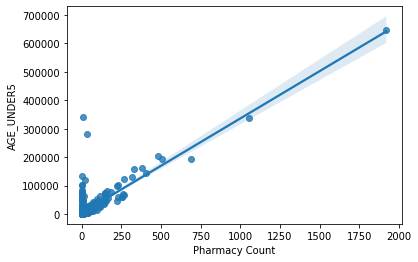

In [122]:
# Plotting scatterplot for population of age below five vs pharmacy count
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_UNDER5"])
plt.savefig("Graphs/Scatterplot_AgeBelow5.jpg")

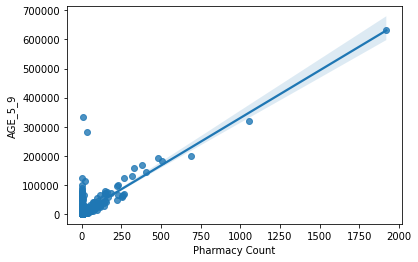

In [123]:
# Plotting scatterplot for population Age 5-9 vs pharmacy count
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_5_9"])
plt.savefig("Graphs/Scatterplot_Age_5_9.jpg")

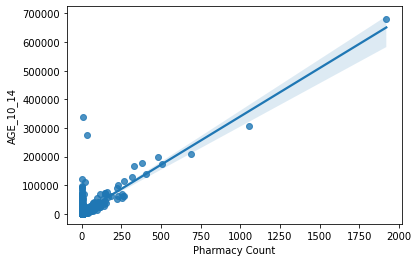

In [124]:
# Plotting scatterplot for population Age 10-14 vs pharmacy count
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_10_14"])
plt.savefig("Graphs/Scatterplot_Age_10_14.jpg")

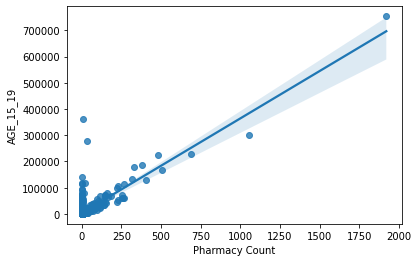

In [125]:
# Plotting scatterplot for population Age 15-19 vs pharmacy count
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_15_19"])
plt.savefig("Graphs/Scatterplot_Age_15_19.jpg")

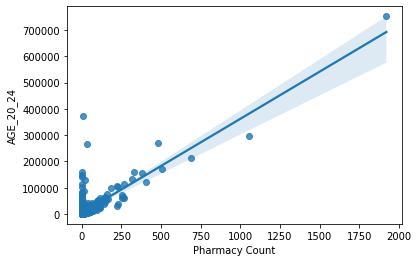

In [128]:
# Plotting scatterplot for population Age 20-24 vs pharmacy count
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_20_24"])
plt.savefig("Graphs/Scatterplot_Age_20_24.jpg")

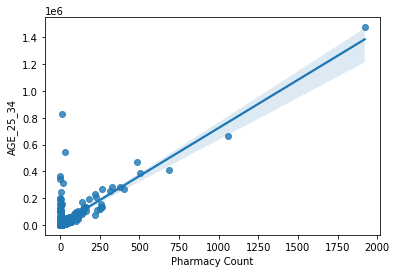

In [129]:
# Plotting scatterplot for population Age 35-9 vs pharmacy count
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_25_34"])
plt.savefig("Graphs/Scatterplot_Age_25_34.jpg")

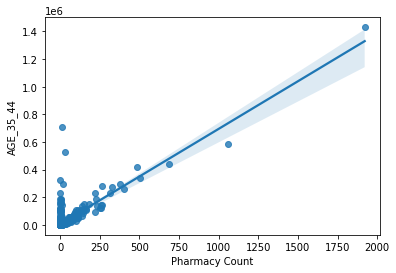

In [130]:
# Plotting scatterplot for population Age 5-9 vs pharmacy count
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_35_44"])
plt.savefig("Graphs/Scatterplot_Age_35_44.jpg")

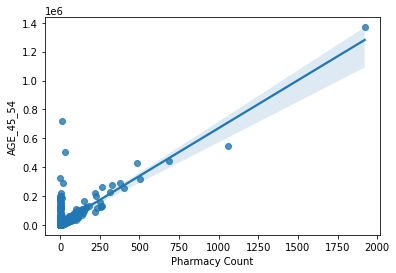

In [131]:
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_45_54"])
plt.savefig("Graphs/Scatterplot_Age_45_54.jpg")

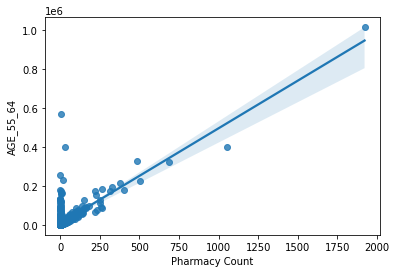

In [132]:
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_55_64"])
plt.savefig("Graphs/Scatterplot_Age_55_64.jpg")

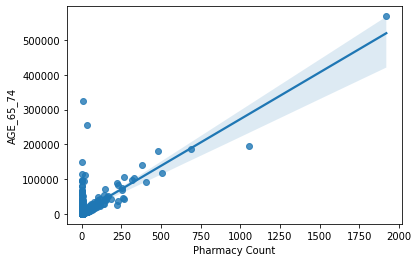

In [133]:
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_65_74"])
plt.savefig("Graphs/Scatterplot_Age_65_74.jpg")

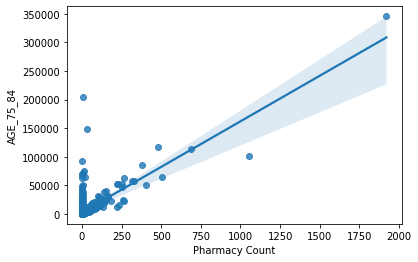

In [134]:
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_75_84"])
plt.savefig("Graphs/Scatterplot_Age_75_84.jpg")

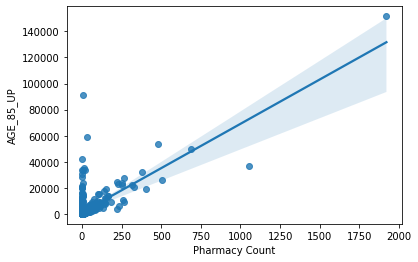

In [135]:
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["AGE_85_UP"])
plt.savefig("Graphs/Scatterplot_Age_85_UP.jpg")

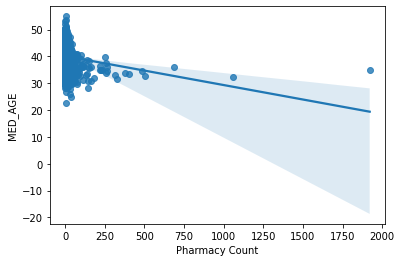

In [141]:
sns.regplot(x=df_ages["Pharmacy Count"], y=df_ages["MED_AGE"])
plt.savefig("Graphs/Scatterplot_Median_Age.jpg")